In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# Simple numerical schemes for solving an ODE

*2023-09-13, kaihc@met.no*

The purpose of this notebook is to illustrate the difference between implicit and explicit numerical schemes, and to demonstrate how numerical schemes can become unstable. We will solve the ODE 

$$\frac{dF}{dt} + \lambda F = 0,$$ 

where $\lambda > 0$, and with initial condition $F(0) = C_0$. We seek the solution for the interval 

$$t \in [0, T].$$ 

The solution to this ODE is of course 

$$F = C_0\exp(-\lambda t),$$ 

and our numerical solutions will be compared to this exact analytical solution.

## Discretisation

We start out by rewriting the ODE as 

$$\frac{dF}{dt} = -\lambda F.$$ 

We now discretise the time interval such that 

$$t_i = i\Delta t, i \in [0,N], \Delta t = T/N,$$ 

and hence we have $t_{i+1} = t_i + \Delta t$.

## Taylor expansion

A simple Taylor expansion yields 

$$F(t_{i+1}) = F(t_i + \Delta t) = F(t_i) + \frac{dF}{dt}|_{t=t_i}\Delta t + O(\Delta t^2),$$ 

which relates the function $F$ evaluated at times $t_{i+1}$ and $t_i$ to the derivative at time $t_i$. We can also write 

$$F(t_{i-1}) = F(t_i - \Delta t) = F(t_i) - \frac{dF}{dt}|_{t=t_i}\Delta t + O(\Delta t^2).$$ 

To simplify, we introduce the notation $F_i = F(t_i)$.

## Explicit scheme

An explicit scheme is obtained by first rewriting the Taylor expansion: 

$$\frac{dF}{dt}|_{t=t_i} = \frac{F_{i+1} -  F_i}{\Delta t} + O(\Delta t).$$ 

If $\Delta t$ is small compared to the other terms, we may ignore the higher order terms, and the numerical scheme becomes [first order accurate](https://en.wikipedia.org/wiki/Order_of_accuracy). Using this approximation for the derivative, we can write a discretised version of the ODE as 

$$\frac{F_{i+1} - F_i}{\Delta t} = -\lambda F_i.$$

or alternatively

$$F_{i+1} = F_i -\Delta t\lambda F_i.$$ 

This scheme is _explicit_ as all the righthand-side terms are evaluated at the current time step $t_i$. Since we know that $F_0 = C_0$, we have the necessary information to iterate the above scheme forward in time to $t_{i+1}$. We may rewrite the scheme such that 

$$F_{i+1} = (1 -\Delta t\lambda) F_i.$$ 


## Implicit scheme

The second Taylor expansion is equivalent to 

$$F(t_{i+1}) = F(t_i) + \frac{dF}{dt}|_{t=t_{i+1}}\Delta t + O(\Delta t^2).$$ 

The numerical scheme now becomes

$$F_{i+1} = F_i -\Delta t\lambda F_{i+1},$$

which is _implicit_, i.e. the forcing is evaluated at the time step we wish to find the solution for. Fortunately, the present example is very simple and we may easily reshuffle the terms to obtain

$$F_{i+1} = \frac{F_i}{(1+\Delta t\lambda)}.$$

## Numerical stability

We know that the analytical solution is a function than decreases monotonically towards zero from the initial value $C_0$. In the numerical integration we must therefore require that $F_{i+1}$ always have the same sign as $F_i$, and that $|F_{i+1}| < |F_i|$. For the explicit scheme, these requirements restrict the value of $\Delta t$. Obviously we cannot have 

$$\Delta t\lambda > 2,$$

because the solution will then grow without bounds. In fact, in order to prevent a sign shift during the integration, we need to make sure that

$$\Delta t < 1/\lambda.$$

The explicit scheme is therefore conditionally stable, i.e. only stable as long as the temporal resolution $\Delta t$ fulfill the first of the above requirements, but it will produce meaningless results unless both requirements are met with. In contrast, the implicit shceme is unconditionally stable for all values of $\Delta t$, which is really the point of this example: implicit schemes are usually more stable than explicit schemes. We need to keep in mind, though, that the accuracy decreases with increasing step size&mdash;in our case here the error is $O(\Delta t)$&mdash;and there is no guarantee that implicit schemes will always produce meaningful results.

Use the simple implementation below to experiment with the two schemes, choosing different values for $C_0$, $T$, $N$ and $\lambda$. Compare also the maximum errors for various values of $\Delta t$. Test e.g. with $N$ = (2000, 200, 20) and assess the size of the errors, and with $N$ = (10, 5) to see what happens when the solution becomes unstable.

In [14]:
# Parameters
lbd = 0.2 # damping coefficient lambda
C0 = 1.0 # initial condition
N = 5 # Number of discrete time steps
T = 60.0 # Simulation length

# Discretising time
n = np.arange(N+1)
dt = T/N
t = n*dt

# Analytical solution
F_analytical = C0*np.exp(-lbd*t)

# Initialising explicit and implicit solutions
F_explicit = np.zeros_like(F_analytical) 
F_explicit[0] = C0 # Initial condition
F_implicit = np.zeros_like(F_analytical)
F_implicit[0] = C0 # Initial condition

for i in range(1,N): # Loop over time vector to integrate solutions
    F_explicit[i] = (1.0 - lbd*dt) * F_explicit[i-1] # eksplisitt skjema   
    F_implicit[i] = F_implicit[i-1]/(1.0 + lbd*dt) # implisitt skjema   

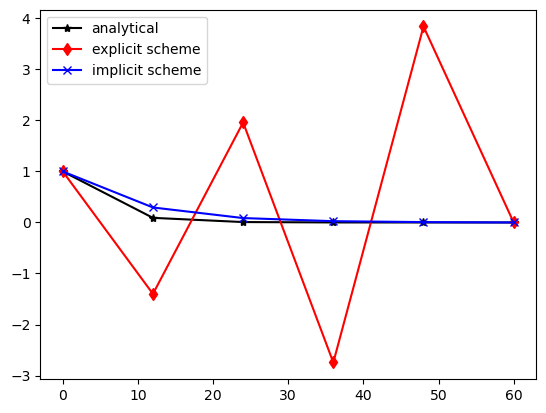

In [15]:
# Plot results
plt.plot(t, F_analytical, 'k-*', label='analytical')
plt.plot(t, F_explicit, 'r-d', label='explicit scheme')
plt.plot(t, F_implicit, 'b-x', label='implicit scheme')
plt.legend()

Time step size: 12.000
dt*lambda: 2.4000


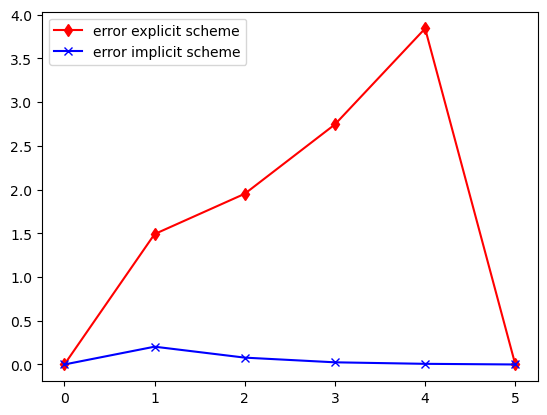

In [16]:
# Diagnostics
print("Time step size: %4.3f" % (dt))
print("dt*lambda: %6.4f" % (dt*lbd))
plt.plot(np.abs(F_analytical-F_explicit), 'r-d', label='error explicit scheme')
plt.plot(np.abs(F_analytical-F_implicit), 'b-x', label='error implicit scheme')
plt.legend()